# Data Download and Initial Exploration

This notebook downloads the Fake and Real News Dataset from Kaggle and performs initial exploration.

In [24]:
# Install required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os
import kaggle

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Step 1: Download Dataset from Kaggle

**Before running this cell, you need to:**
1. Create a Kaggle account at kaggle.com
2. Go to Account settings and create an API token
3. Download the kaggle.json file
4. Place it in ~/.kaggle/ directory (create if doesn't exist)
5. Set permissions: `chmod 600 ~/.kaggle/kaggle.json`

In [25]:
# Download the dataset
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset -p ../data/ --unzip

print("Dataset downloaded successfully!")
print("Files in data directory:")
!ls -la ../data/

Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
100%|██████████████████████████████████████| 41.0M/41.0M [00:04<00:00, 10.1MB/s]
100%|██████████████████████████████████████| 41.0M/41.0M [00:04<00:00, 10.2MB/s]
Dataset downloaded successfully!
Files in data directory:
total 484696
drwxr-xr-x   6 nishantdoss  staff        192 Nov 29 22:48 .
drwxr-xr-x  13 nishantdoss  staff        416 Nov 29 22:44 ..
-rw-r--r--   1 nishantdoss  staff   62789876 Nov 29 22:48 Fake.csv
-rw-r--r--   1 nishantdoss  staff   53582940 Nov 29 22:48 True.csv
-rw-r--r--   1 nishantdoss  staff  116947643 Nov 29 19:04 combined_news_dataset.csv
-rw-r--r--   1 nishantdoss  staff   13126936 Nov 29 19:04 sample_news_dataset.csv


## Step 2: Load and Examine the Data

In [26]:
# Load the datasets
fake_df = pd.read_csv('../data/Fake.csv')
true_df = pd.read_csv('../data/True.csv')

print(f"Fake news articles: {len(fake_df)}")
print(f"True news articles: {len(true_df)}")

# Add labels
fake_df['label'] = 0  # Fake
true_df['label'] = 1  # True

# Combine datasets
df = pd.concat([fake_df, true_df], ignore_index=True)
print(f"\nTotal articles: {len(df)}")

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print("\nDataset info:")
print(df.info())

Fake news articles: 23481
True news articles: 21417

Total articles: 44898

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None


In [27]:
# Examine the structure
print("Column names:")
print(df.columns.tolist())

print("\nFirst few rows:")
df.head()

Column names:
['title', 'text', 'subject', 'date', 'label']

First few rows:


,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


In [28]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Check label distribution
print("\nLabel distribution:")
print(df['label'].value_counts())
print(f"\nPercentage - Fake: {(df['label']==0).mean():.1%}, True: {(df['label']==1).mean():.1%}")

Missing values:
title      0
text       0
subject    0
date       0
label      0
dtype: int64

Label distribution:
label
0    23481
1    21417
Name: count, dtype: int64

Percentage - Fake: 52.3%, True: 47.7%


## Step 3: Basic Text Statistics

In [29]:
# Calculate text length statistics
df['title_length'] = df['title'].str.len()
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

# Basic statistics
print("Text Length Statistics:")
print(df[['title_length', 'text_length', 'word_count']].describe())

Text Length Statistics:
       title_length   text_length    word_count
count  44898.000000  44898.000000  44898.000000
mean      80.111720   2469.109693    405.282284
std       25.379685   2171.617091    351.265595
min        8.000000      1.000000      0.000000
25%       63.000000   1234.000000    203.000000
50%       73.000000   2186.000000    362.000000
75%       91.000000   3105.000000    513.000000
max      286.000000  51794.000000   8135.000000


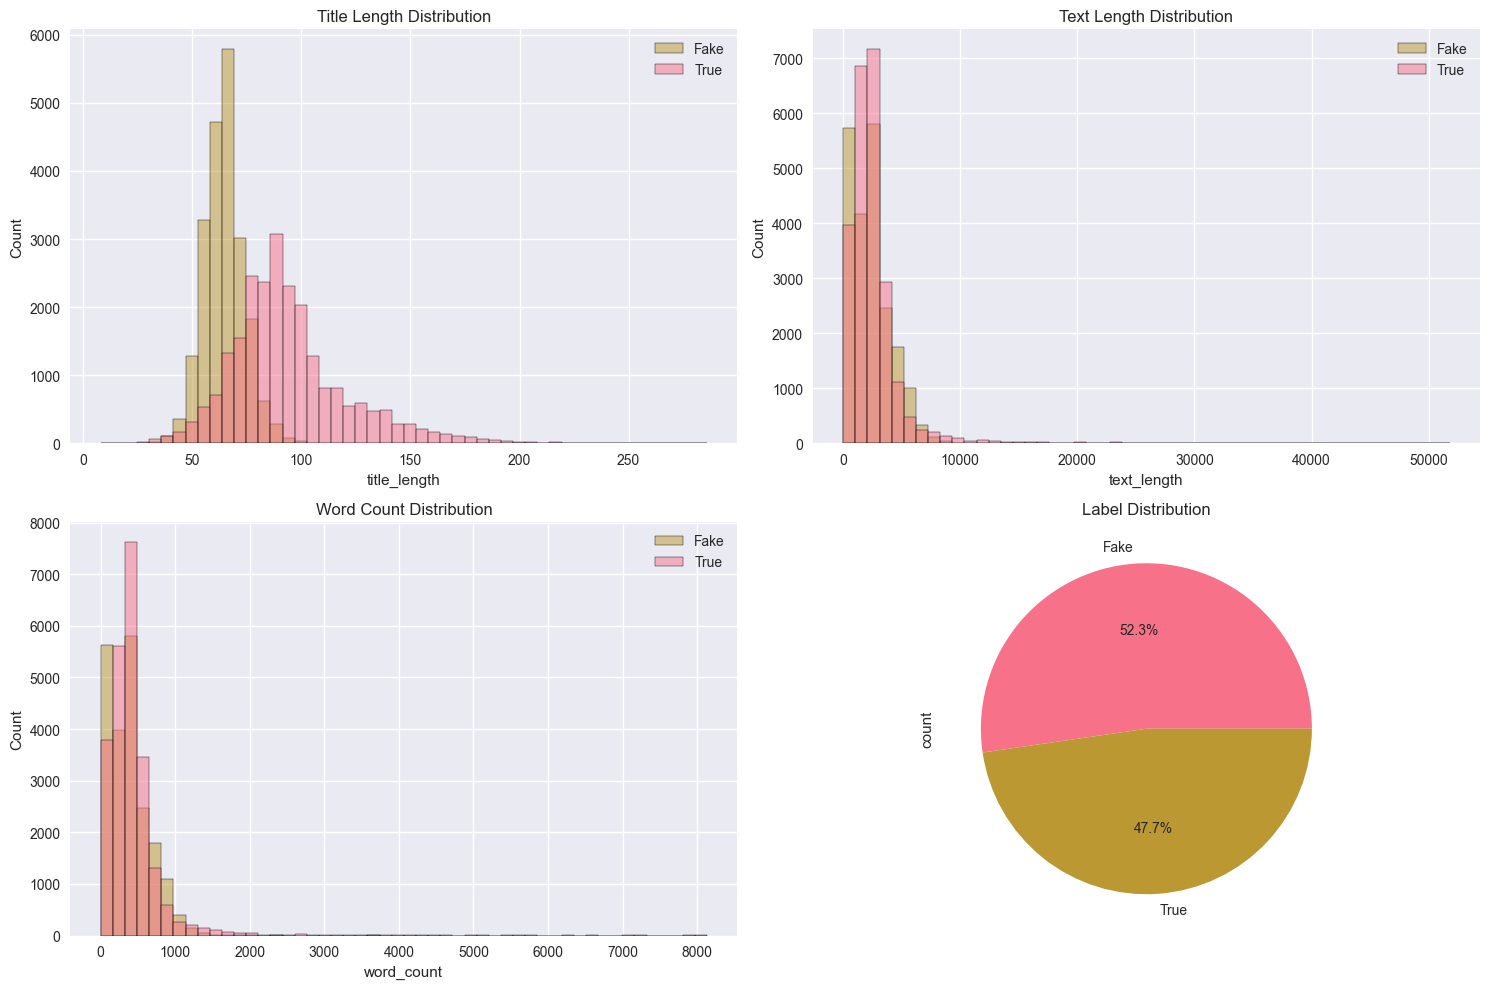

In [30]:
# Visualize text length distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Title length by label
sns.histplot(data=df, x='title_length', hue='label', bins=50, ax=axes[0,0])
axes[0,0].set_title('Title Length Distribution')
axes[0,0].legend(['Fake', 'True'])

# Text length by label
sns.histplot(data=df, x='text_length', hue='label', bins=50, ax=axes[0,1])
axes[0,1].set_title('Text Length Distribution')
axes[0,1].legend(['Fake', 'True'])

# Word count by label
sns.histplot(data=df, x='word_count', hue='label', bins=50, ax=axes[1,0])
axes[1,0].set_title('Word Count Distribution')
axes[1,0].legend(['Fake', 'True'])

# Label distribution pie chart
df['label'].value_counts().plot(kind='pie', ax=axes[1,1], 
                               labels=['Fake', 'True'], autopct='%1.1f%%')
axes[1,1].set_title('Label Distribution')

plt.tight_layout()
plt.show()

## Step 4: Subject Analysis

In [31]:
# Analyze subjects/topics
print("Subjects in the dataset:")
print(f"Total unique subjects: {df['subject'].nunique()}")
print("\nTop subjects:")
print(df['subject'].value_counts().head(10))

Subjects in the dataset:
Total unique subjects: 8

Top subjects:
subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


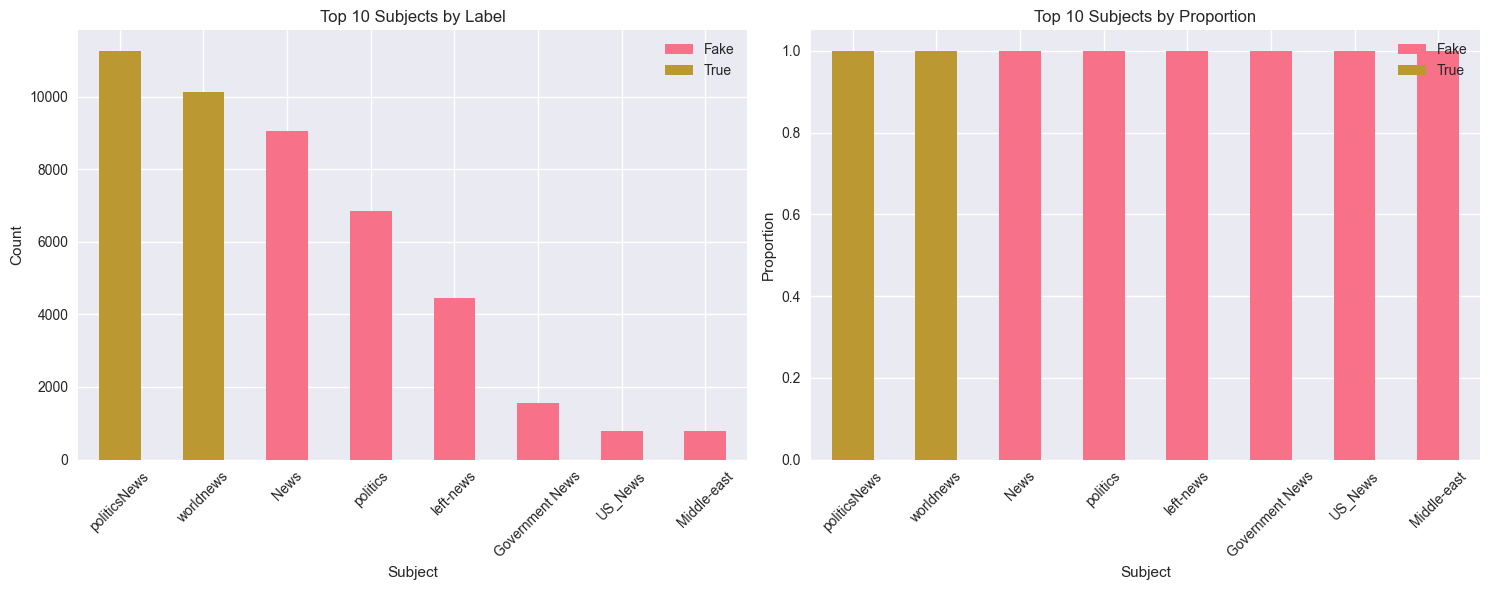

In [32]:
# Subject distribution by label
subject_label = df.groupby(['subject', 'label']).size().unstack(fill_value=0)
subject_label['total'] = subject_label.sum(axis=1)
subject_label = subject_label.sort_values('total', ascending=False).head(10)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Stacked bar chart
subject_label[[0, 1]].plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Top 10 Subjects by Label')
axes[0].set_xlabel('Subject')
axes[0].set_ylabel('Count')
axes[0].legend(['Fake', 'True'])
axes[0].tick_params(axis='x', rotation=45)

# Proportional bar chart
subject_prop = subject_label[[0, 1]].div(subject_label[[0, 1]].sum(axis=1), axis=0)
subject_prop.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Top 10 Subjects by Proportion')
axes[1].set_xlabel('Subject')
axes[1].set_ylabel('Proportion')
axes[1].legend(['Fake', 'True'])
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Step 5: Word Clouds

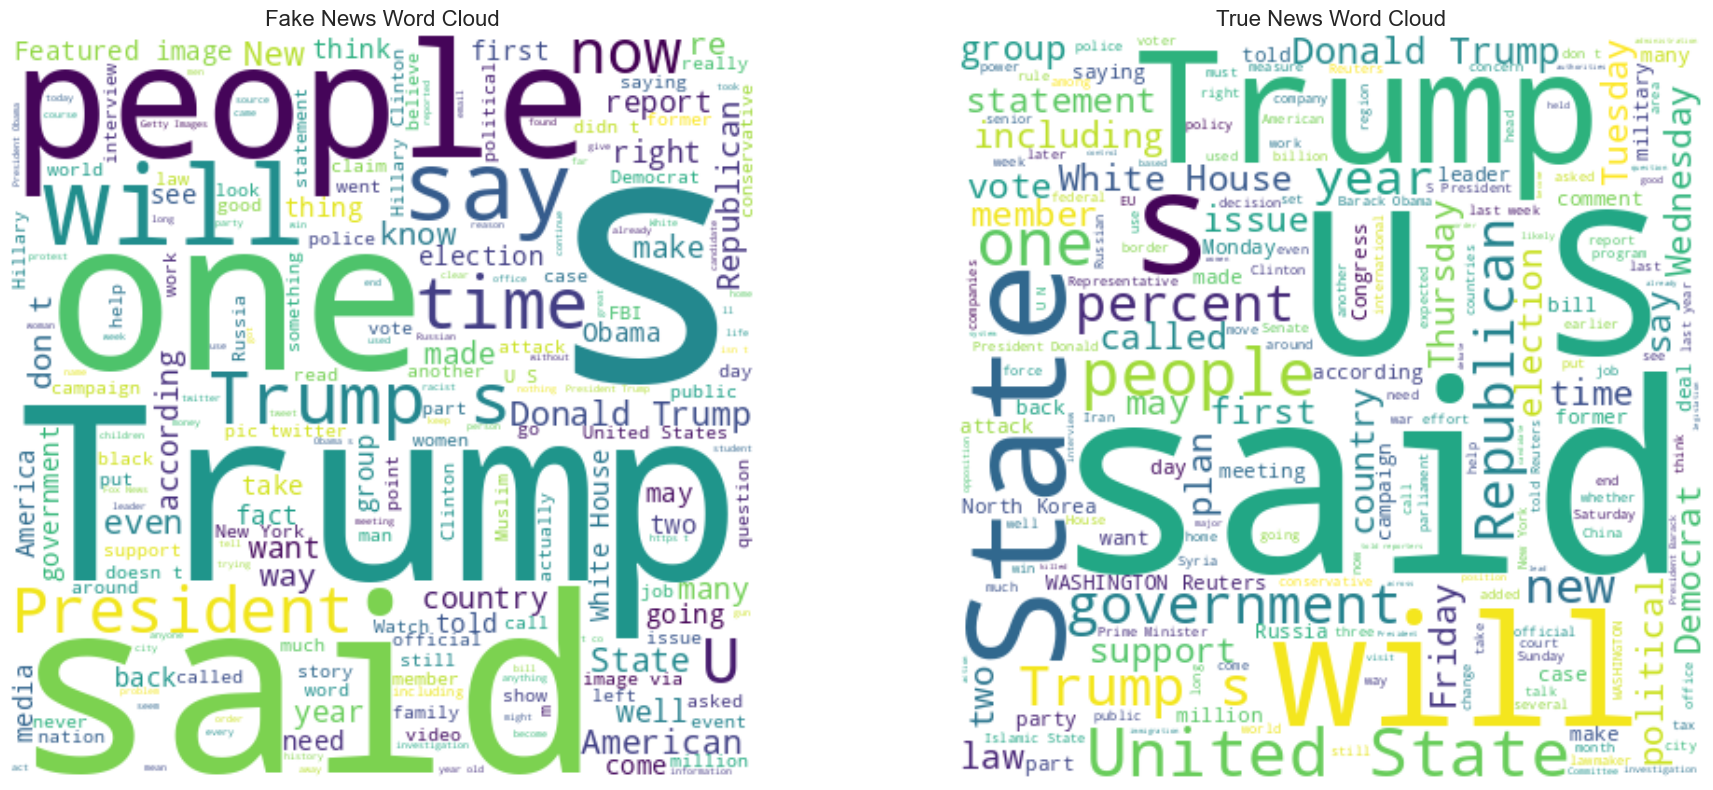

In [33]:
# Create word clouds for fake and true news
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Fake news word cloud
fake_text = ' '.join(df[df['label'] == 0]['text'].head(1000))  # Use first 1000 for speed
wordcloud_fake = WordCloud(width=400, height=400, background_color='white').generate(fake_text)
axes[0].imshow(wordcloud_fake, interpolation='bilinear')
axes[0].set_title('Fake News Word Cloud', fontsize=16)
axes[0].axis('off')

# True news word cloud
true_text = ' '.join(df[df['label'] == 1]['text'].head(1000))  # Use first 1000 for speed
wordcloud_true = WordCloud(width=400, height=400, background_color='white').generate(true_text)
axes[1].imshow(wordcloud_true, interpolation='bilinear')
axes[1].set_title('True News Word Cloud', fontsize=16)
axes[1].axis('off')

plt.tight_layout()
plt.show()

## Step 6: Save Processed Dataset

In [34]:
# Save the combined and shuffled dataset
df.to_csv('../data/combined_news_dataset.csv', index=False)
print(f"Combined dataset saved with {len(df)} articles")

# Save a smaller sample for quick testing
sample_df = df.sample(n=5000, random_state=42)
sample_df.to_csv('../data/sample_news_dataset.csv', index=False)
print(f"Sample dataset saved with {len(sample_df)} articles for quick testing")

Combined dataset saved with 44898 articles
Sample dataset saved with 5000 articles for quick testing


## Key Findings

1. **Dataset Size**: The dataset contains approximately 44,000 articles total
2. **Balance**: The dataset appears well-balanced between fake and true news
3. **Text Length**: Articles vary significantly in length, which may require preprocessing
4. **Subjects**: Multiple news subjects are represented, providing diversity
5. **Word Patterns**: Initial word clouds show different vocabulary patterns between fake and true news

## Save Data for Next Notebook

**Note**: This saves all the variables and datasets for use in subsequent notebooks.

In [35]:
# DATA PERSISTENCE: Save all variables for next notebook
import pickle
import os

# Create directories if they don't exist
os.makedirs('../models', exist_ok=True)
os.makedirs('../data/persistence', exist_ok=True)

# Save the main dataset with all computed features
df.to_csv('../data/persistence/notebook1_df.csv', index=False)

# Save text statistics
text_stats = df[['title_length', 'text_length', 'word_count']].describe()
text_stats.to_csv('../data/persistence/notebook1_text_stats.csv')

# Save subject analysis
subject_analysis = df['subject'].value_counts()
subject_analysis.to_csv('../data/persistence/notebook1_subject_analysis.csv')

# Save individual dataframes
fake_df.to_csv('../data/persistence/notebook1_fake_df.csv', index=False)
true_df.to_csv('../data/persistence/notebook1_true_df.csv', index=False)

# Save key variables as pickle
notebook1_vars = {
    'dataset_size': len(df),
    'fake_count': len(fake_df),
    'true_count': len(true_df),
    'subjects': df['subject'].unique().tolist(),
    'label_distribution': df['label'].value_counts().to_dict()
}

with open('../data/persistence/notebook1_variables.pkl', 'wb') as f:
    pickle.dump(notebook1_vars, f)

print("✅ DATA PERSISTENCE: All variables saved!")
print("📁 Files saved to: ../data/persistence/")
print("📊 Main dataset: notebook1_df.csv")
print("📈 Text statistics: notebook1_text_stats.csv") 
print("📋 Variables: notebook1_variables.pkl")
print("\n🔗 Ready for Notebook 2: Preprocessing and Baseline Models")

✅ DATA PERSISTENCE: All variables saved!
📁 Files saved to: ../data/persistence/
📊 Main dataset: notebook1_df.csv
📈 Text statistics: notebook1_text_stats.csv
📋 Variables: notebook1_variables.pkl

🔗 Ready for Notebook 2: Preprocessing and Baseline Models
